<a href="https://colab.research.google.com/github/Bryan-Az/CMPE-255-HW2/blob/main/PyCaret_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 78.7 MB/s eta 0:

In [7]:
import pandas as pd #these two packages are useful for the whole assignment
import pycaret

## Classification

### Binary Classification

#### Setup Stage

In [8]:
from pycaret.classification import * #these packages are useful for the classification section of this assignment
from pycaret.classification import ClassificationExperiment

In [11]:
#importing the prepared image metadata from the National Gallery of Arts OpenData program (a Creative Commons github repo)
latinamerican_art = pd.read_csv('latinamerican_art.csv', error_bad_lines=False, warn_bad_lines=False)
non_latinamerican_art = pd.read_csv('non_latinamerican_art.csv',  error_bad_lines=False, warn_bad_lines=False)

In [12]:
#As you can see we have a very small latin american dataset of artwork for which we wish to identify and classify
print(latinamerican_art.shape)
print(non_latinamerican_art.shape)

(628, 40)
(14068, 40)


In [97]:
# I will create the Y-feature (is_latinamerican) as a Boolean (0/1)
latinamerican_art['is_latinamerican'] = [1] * len(latinamerican_art)
non_latinamerican_art['is_latinamerican'] = [0] * len(non_latinamerican_art)

In [98]:
# I will concatenate the datasets so the algorithm can randomize and split for generalized training
nga_artwork_metadata = pd.concat([latinamerican_art, non_latinamerican_art])

In [99]:
nga_artwork_metadata.reset_index(drop=True, inplace=True)

In [17]:
classify_artwork_setup = setup(nga_artwork_metadata, target = 'is_latinamerican', session_id=777)

,Description,Value
0,Session id,6130
1,Target,is_latinamerican
2,Target type,Binary
3,Original data shape,"(14696, 41)"
4,Transformed data shape,"(14696, 116)"
5,Transformed train set shape,"(10287, 116)"
6,Transformed test set shape,"(4409, 116)"
7,Numeric features,8
8,Categorical features,32
9,Rows with missing values,100.0%


In [18]:
classification_isLatinAmerican_artwork = ClassificationExperiment()


In [19]:
classification_isLatinAmerican_artwork.setup(nga_artwork_metadata, target='is_latinamerican', session_id = 777)

,Description,Value
0,Session id,777
1,Target,is_latinamerican
2,Target type,Binary
3,Original data shape,"(14696, 41)"
4,Transformed data shape,"(14696, 126)"
5,Transformed train set shape,"(10287, 126)"
6,Transformed test set shape,"(4409, 126)"
7,Numeric features,8
8,Categorical features,32
9,Rows with missing values,100.0%


#### Model Selection Stage

In [20]:
model_classification_isLatinAmerican_artwork = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,4.0500
ridge,Ridge Classifier,0.8000,0.0000,0.8000,0.8000,0.8000,0.8000,0.8000,3.3940
qda,Quadratic Discriminant Analysis,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,3.8800
ada,Ada Boost Classifier,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,3.5450
lda,Linear Discriminant Analysis,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,3.9000
et,Extra Trees Classifier,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,4.4370
xgboost,Extreme Gradient Boosting,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000,4.5920
rf,Random Forest Classifier,0.7995,0.8000,0.7886,0.8000,0.7942,0.7939,0.7940,4.3450
gbc,Gradient Boosting Classifier,0.7993,0.8000,0.7841,0.8000,0.7919,0.7915,0.7916,4.8950
lr,Logistic Regression,0.7913,0.7651,0.6000,0.6000,0.6000,0.5998,0.5993,8.8730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the looks of the above stage, due to the lack of sufficient data in the target class, ~(600/200600 rows), there are many classifiers which overfit. Given we have many models to choose from, I would pick the KNN/RandomForest/GradientBoosting Classifier as the 'best' considering the limitations. This model has high Recall/Precision/Accuracy, without overfitting. Now we will move on to visualizing the model performance before moving on to the next stage. There are many visualizations and metrics to tinker with, but for the purposes of this assignment and my own interest working with the features - I want to see which features have the best importance to the estimator.

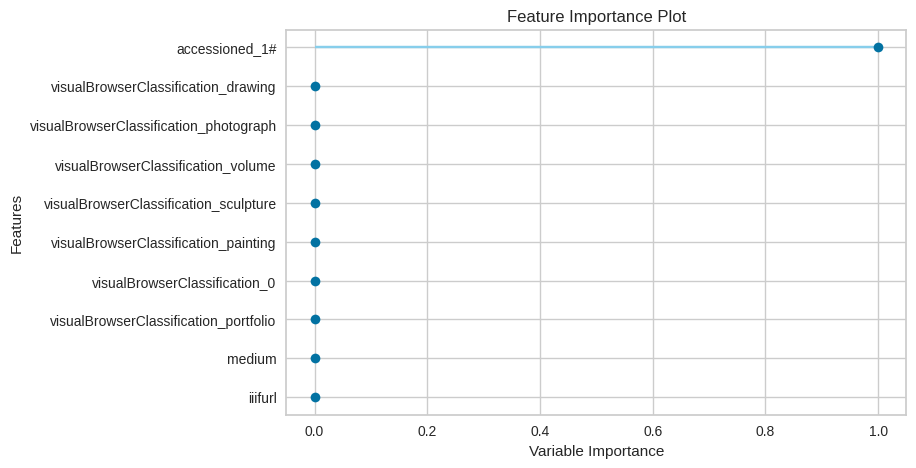

In [21]:
plot_model(model_classification_isLatinAmerican_artwork, plot='feature')

The above plot shows that the top feature is artistofngaobject/accessioned(the name of the artist), artistofngaobject is simply a boolean if the display name is the actual name of the artist, this seems to be the model detecting people and using them as a key to determining if they are latinamerican - which I see being a good sign. However, the following confusion matrix validates my assumption that it is overfitting. PyCaret seems to choose the overfit models rather than the KNN.

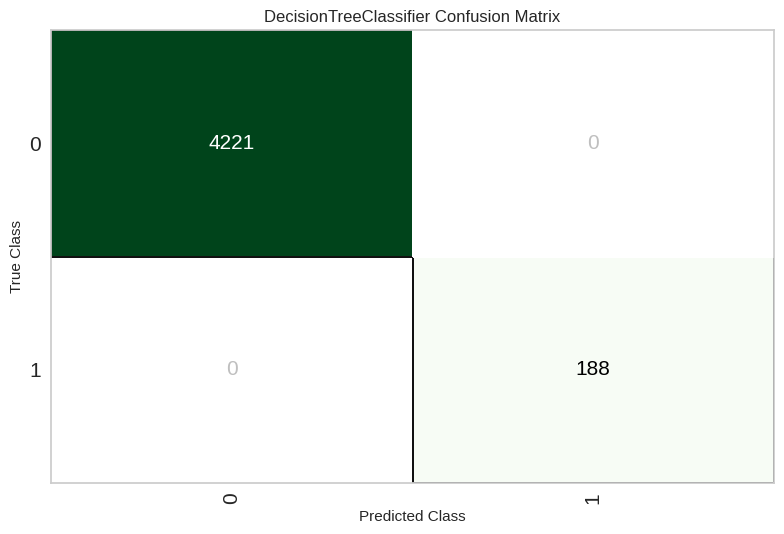

In [22]:
plot_model(model_classification_isLatinAmerican_artwork, plot='confusion_matrix')

###Multiclass Classification

#### Setup Stage

In [23]:
#dropping the artistofnga feature in the dataset to check if this makes a difference
nga_artwork_metadata = nga_artwork_metadata.drop('artistofngaobject', axis=1)

In [24]:
nga_artwork_metadata.columns

Index(['iiifurl', 'iiifthumburl', 'accessioned', 'title',
       'displayDate_created', 'roletype', 'role', 'forwarddisplayname',
       'birthyear', 'deathyear', 'ulanid', 'nationality', 'constituenttype',
       'beginyear_artistAssigned', 'endyear_artistAssigned',
       'country_artistAssigned', 'zipcode_artistAssigned', 'medium',
       'dimensions', 'inscription', 'markings', 'attribution',
       'visualBrowserClassification', 'parentID', 'isVirtual', 'portfolio',
       'series', 'volume', 'watermarks', 'uuid', 'viewtype', 'sequence',
       'width', 'height', 'maxpixels', 'assistivetext', 'depictstmsobjectid',
       'objectid', 'constituentid', 'is_latinamerican'],
      dtype='object')

In [100]:
nga_artwork_metadata = nga_artwork_metadata.where(nga_artwork_metadata.visualBrowserClassification.notna()).dropna(how='all')

In [101]:
nga_artwork_metadata.shape #using medium as the target variable reduced the overall size of the dataset

(14635, 41)

In [102]:
nga_artwork_metadata.is_latinamerican.value_counts() #luckily, it only shrank the non_latinamerican_set!

0.0    14007
1.0      628
Name: is_latinamerican, dtype: int64

In [86]:
mask = nga_artwork_metadata.isin([' 1902. Framed gravure / Alfred Stieglitz / 509 Madison Ave.'])
cols_with_element = mask.any()
cols_with_element = cols_with_element[cols_with_element].index.tolist()


In [87]:
cols_with_element

['isVirtual']

In [103]:
categorical_artFeatures = ['isVirtual','parentID','endyear_artistAssigned','beginyear_artistAssigned','ulanid','deathyear','birthyear','accessioned','iiifurl', 'iiifthumburl','title', 'displayDate_created', 'roletype', 'role', 'forwarddisplayname', 'nationality', 'constituenttype', 'country_artistAssigned', 'dimensions', 'inscription', 'markings', 'attribution','medium', 'portfolio', 'series', 'volume', 'watermarks', 'uuid', 'viewtype', 'assistivetext']
numerical_artFeatures = ['zipcode_artistAssigned', 'sequence', 'width', 'height', 'maxpixels', 'depictstmsobjectid', 'objectid', 'constituentid', 'is_latinamerican']

In [104]:
dtype_dict = {col: 'float64' for col in numerical_artFeatures}
dtype_dict.update({col: 'category' for col in categorical_artFeatures})

In [105]:
nga_artwork_metadata = nga_artwork_metadata.astype(dtype_dict)

In [106]:
#given our dataset has shrank, we might see less overfitting
multiclass_medium_artwork_setup = setup(nga_artwork_metadata, target = 'visualBrowserClassification', session_id = 777, numeric_features=numeric_artfeatures, categorical_features=categorical_artFeatures)

,Description,Value
0,Session id,777
1,Target,visualBrowserClassification
2,Target type,Multiclass
3,Target mapping,"lower right corner: 0, typed on Museum of Modern Art sticker: 40.5022 / Stieglitz; upper right: 1, upper right in graphite: X-BAB.005; lower right: ICP 1981.1145 GT: 2, 0: 3, 173333: 4, decorative art: 5, drawing: 6, new media: 7, painting: 8, photograph: 9, portfolio: 10, print: 11, sculpture: 12, technical material: 13, volume: 14"
4,Original data shape,"(14635, 41)"
5,Transformed data shape,"(14635, 58)"
6,Transformed train set shape,"(10244, 58)"
7,Transformed test set shape,"(4391, 58)"
8,Ordinal features,1
9,Numeric features,9


In [107]:
multiclass_medium_artwork = ClassificationExperiment()

In [110]:
multiclass_medium_artwork.setup(nga_artwork_metadata, target = 'visualBrowserClassification', session_id = 777, numeric_features=numeric_artfeatures, categorical_features=categorical_artFeatures)

,Description,Value
0,Session id,777
1,Target,visualBrowserClassification
2,Target type,Multiclass
3,Target mapping,"lower right corner: 0, typed on Museum of Modern Art sticker: 40.5022 / Stieglitz; upper right: 1, upper right in graphite: X-BAB.005; lower right: ICP 1981.1145 GT: 2, 0: 3, 173333: 4, decorative art: 5, drawing: 6, new media: 7, painting: 8, photograph: 9, portfolio: 10, print: 11, sculpture: 12, technical material: 13, volume: 14"
4,Original data shape,"(14635, 41)"
5,Transformed data shape,"(14635, 58)"
6,Transformed train set shape,"(10244, 58)"
7,Transformed test set shape,"(4391, 58)"
8,Ordinal features,1
9,Numeric features,9


#### Model Selection Stage

In [111]:
model_multiclass_medium_artwork = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4201,0.0000,0.4201,0.1961,0.2674,0.0000,0.0000,6.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the above output, it seems like there was an issue training the other models, and the only model to be used is the dummy model. The dummy model is only used for baseline comparisons and is not a real model. Given this information, in the future, I would try to troubleshoot why the other models could not be trained - it seems there may be high cardinality in the medium classifications, and some feature engineering may be needed. Due to this issue, visualizations cannot be made so I will be moving on to the next stage in data analysis.

## Regression

### Setup Stage

In [ ]:
from pycaret.regression import * #this is necessary to run a regression model with pycaret (any class)
from pycaret.regression import RegressionExperiment #this will import the regression experiment class

For this section, I will be using the 'real year' feature of the global housing kaggle dataset. This feature is noted as being the nominal price series deflated by the consumer price index. I assume this means that this feature is normalized, and may be better for comparing housing growth rates between countries having varying levels of housing prices.

In [ ]:
house_prices = pd.read_csv('real-year_dropna.csv') #this is the 'clean' version of the dataset and null values for real-year are dropped

In [ ]:
house_prices.tail()

In [ ]:
regress_setup = setup(house_prices, target = 'price', session_id = 777)

In [ ]:
regressGlobalHouseTrends = RegressionExperiment()

In [ ]:
regressGlobalHouseTrends.setup(house_prices, target='price', session_id = 777)

### Model Selection Stage

In [ ]:
models_regression_GlobalHouseTrends = compare_models()

From the looks of the above stage, the gradient boosting regressor works best. Now we will move on to visualizing the model performance before moving on to the next stage.

In [ ]:
plot_model(models_regression_GlobalHouseTrends, plot = 'residuals')

The above plot shows the difference in R^2 in the scoring of the regression model on the test/train split of the data. As the model scored 0.151 on the test split, the model is closer to 0 therefore the country and date features are not contributing as much to the estimator as imagined, and the variance in the price may be due to other features not present within the data.

## Clustering

## Anomaly Detection

## Association Rules Mining

## Time Series Forecasting - Univariate without Exogenous Variables

## Time Series Forecasting - Univariate with Exogenous Variables